/tmp/ipykernel_9459/1273298484.py:49: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  data_max = filters.maximum_filter(image, size)


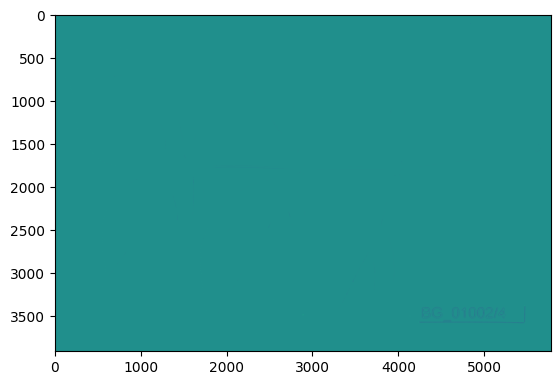

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import scipy.ndimage.filters as filters

# wczytanie obrazów
# I  = cv2.imread("I.jpg")
# J  = cv2.imread("J.jpg")
# f1_original  = cv2.imread("BG_0005.tif")
f1_original  = cv2.imread("FeatureDetection_Input.bmp")
f1 = cv2.cvtColor(f1_original, cv2.COLOR_BGR2GRAY)
# f2 = cv2.cvtColor(f2_original, cv2.COLOR_BGR2GRAY)

# cv2.imshow("F1", f1)
# cv2.imshow("F2", f2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


def harris(I_GR, size_sobel, size_gauss):
    sobelx = cv2.Sobel(I_GR, cv2.CV_32F, 1, 0, ksize=size_sobel)
    sobely = cv2.Sobel(I_GR, cv2.CV_32F, 0, 1, ksize=size_sobel)
    x2 = sobelx * sobelx
    y2 = sobely * sobely
    xy = sobelx * sobely
    # Gx = native_divide(native_sqrt(Gx * Gx + Gy * Gy), (float4)(2));
    xd = np.sqrt(sobelx*sobelx + sobely*sobely) / 2
    cv2.imshow('x',xd)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    plt.imshow(xd)

    gauss_x2 = cv2.GaussianBlur(x2, (size_gauss, size_gauss), 0)
    gauss_y2 = cv2.GaussianBlur(y2, (size_gauss, size_gauss), 0)
    gauss_xy = cv2.GaussianBlur(xy, (size_gauss, size_gauss), 0)
    
    det = gauss_x2*gauss_y2 - gauss_xy*gauss_xy
    trace = gauss_x2 + gauss_y2
    
    H = det - 0.05*(trace*trace)
    plt.imshow(H)
    # cv2.imwrite('test.bmp', H)
    H = cv2.normalize(H, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    return H

def find_max (image, size, threshold) : # size - maximum filter mask size
    data_max = filters.maximum_filter(image, size)
    maxima = (image == data_max)
    diff = image > threshold
    maxima [diff == 0] = 0
    return np.nonzero(maxima)

h1 = harris(f1, 3, 5)
max1 = find_max(h1, 7, 0.55)


def plot_im(max1, image1):
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.plot(max1[1], max1[0], '*', color='m')
    plt.title('Obraz 1')

  


# plot_im(max1, f1_original)

/tmp/ipykernel_6659/1389774781.py:39: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  data_max = filters.maximum_filter(image, size)


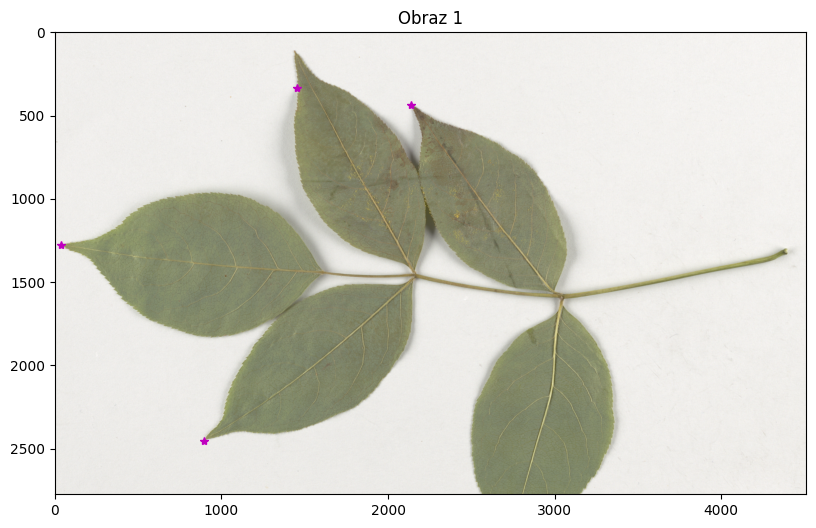

In [ ]:
h1 = harris(f1, 7, 7)
max1 = find_max(h1, 7, 0.77)

plot_im(max1, f1_original)

/tmp/ipykernel_9459/2181197032.py:42: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  data_max = filters.maximum_filter(image, size)


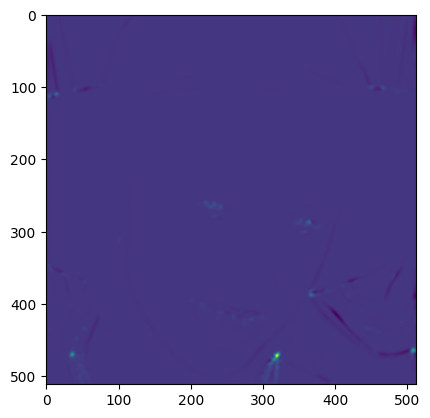

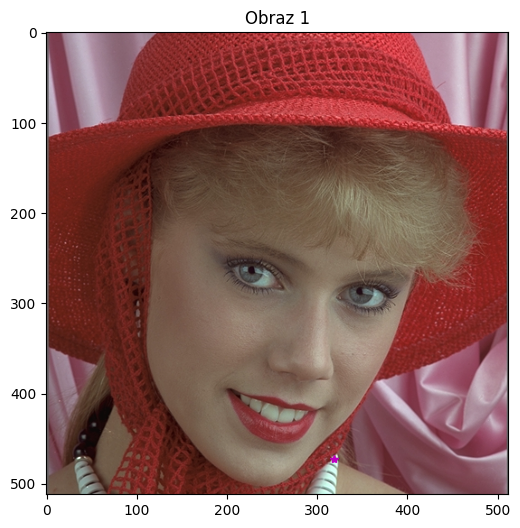

In [19]:
h1 = harris(f1, 13,13)
max1 = find_max(h1, 13, 0.82)

plot_im(max1, f1_original)


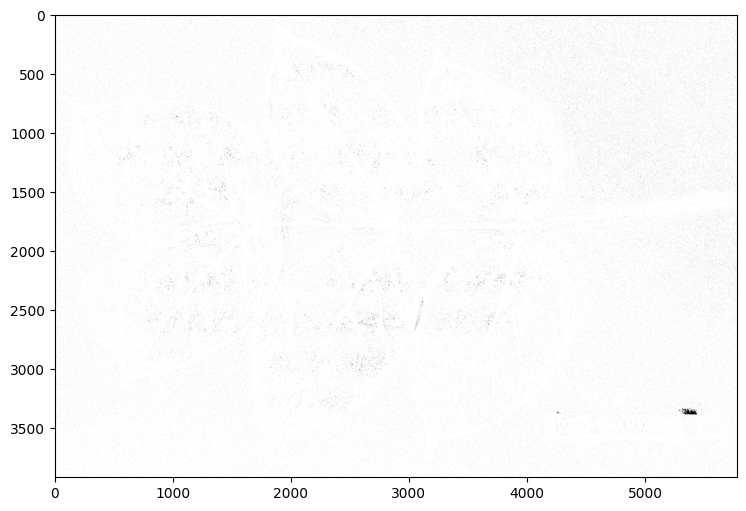

In [32]:
f1_original  = cv2.imread("/home/zosia/aaw/feature_detection_opencl/materialy_feature_points/FeatureDetection_FinOutput copy.bmp")
# f1 = cv2.cvtColor(f1_original, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12, 6))
plt.imshow(f1_original)
# print(f1_original)


In [ ]:
# h1 = harris(f1, 5,5)
# max1 = find_max(h1, 5, 0.55)

# plot_im(max1, f1_original)

In [ ]:
import cv2

I = cv2.imread('FeatureDetection_FinOutput.bmp')
print(I)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [18]:
P = cv2.imread('/home/zosia/aaw/feature_detection_opencl/feature_detection/bin/x86_64/Release/FeatureDetection_Input.bmp')
cv2.imwrite('/home/zosia/aaw/feature_detection_opencl/feature_detection/bin/x86_64/Release/FeatureDetection_Input.bmp', P)

True